In [2]:
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
file_name = "SPC_TRADE_FOOD.csv"
file_path = "data/SPC/"

# Open CSV file in pandas
df_raw = pd.read_csv(file_path + file_name)

In [5]:
# Get column name
df_column_name = list(df_raw.columns.values)
for el in df_column_name:
    print(el)

DATAFLOW
FREQ: Frequency
INDICATOR: Indicator
IMPORTER: Importer
EXPORTER: Exporter
COMMODITY: Commodity
TIME_PERIOD: Time
OBS_VALUE
UNIT_MEASURE: Unit of measure
UNIT_MULT: Unit multiplier
OBS_STATUS: Observation Status
DATA_SOURCE: Data source
OBS_COMMENT: Comment


In [11]:
# Get unique value of each column
# for el in df_column_name:
#     print(el)
#     print(df_raw[el].unique())

# Column detail
- DATAFLOW --> SPC:DF_TRADE_FOOD(1.0)
- FREQ: Frequency --> A: Annual
- INDICATOR: Indicator --> Q: Quantity
- IMPORTER: Importer
    - 'CK: Cook Islands'
    - 'MH: Marshall Islands'
    - 'TO: Tonga'
    - 'VU: Vanuatu'
    - 'KI: Kiribati'
    - 'NC: New Caledonia'
    - 'NR: Nauru'
    - 'FM: Federated State of Micronesia'
    - 'PW: Palau'
    - 'NU: Niue'
    - 'PG: Papua New Guinea'
    - 'WS: Samoa'
    - 'FJ: Fiji'
    - 'SB: Solomon Islands'
    - 'PF: French Polynesia'
    - 'TV: Tuvalu'
    - 'WF: Wallis and Futuna Islands'
    - 'TK: Tokelau'
- EXPORTER: Exporter --> AU_NZ: Australia and New Zealand'
- COMMODITY: Commodity -->
    - '02: Meat and edible meat offal'
    - '03: Fish, crustaceans, molluscs, aquatic invertebrates ne'
    - '04: Dairy products, eggs, honey, edible animal product nes'
    - '07: Edible vegetables and certain roots and tubers'
    - '08: Edible fruit, nuts, peel of citrus fruit, melons'
    - '09: Coffee, tea, mate and spices'
    - '10: Cereals'
    - '11: Milling products, malt, starches, inulin, wheat glute'
    - '12: Oil seed, oleagic fruits, grain, seed, fruit, etc, ne'
    - '15: Animal,vegetable fats and oils, cleavage products, et'
    - '16: Meat, fish and seafood food preparations nes'
    - '17: Sugars and sugar confectionery'
    - '18: Cocoa and cocoa preparations'
    - '19: Cereal, flour, starch, milk preparations and products'
    - '20: Vegetable, fruit, nut, etc food preparations'
    - '21: Miscellaneous edible preparations'
    - '22: Beverages, spirits and vinegar'
    - '24: Tobacco and manufactured tobacco substitutes'
- TIME_PERIOD: Time --> 1995 --> 2018
- OBS_VALUE --> quantité échangée
- UNIT_MEASURE: Unit of measure --> 'TON: tonnes'
- UNIT_MULT: Unit multiplier --> nan
- OBS_STATUS: Observation Status --> nan
- DATA_SOURCE: Data source --> nan
- OBS_COMMENT: Comment --> nan

In [10]:
# Suppression des colonnes non utiles pour l'analyse (mono valeur ou vide)
df_drop = df_raw.drop(columns=['DATAFLOW', 'FREQ: Frequency', 'INDICATOR: Indicator', 'UNIT_MULT: Unit multiplier',
                          'OBS_STATUS: Observation Status', 'DATA_SOURCE: Data source', 'OBS_COMMENT: Comment', 'UNIT_MEASURE: Unit of measure', 'EXPORTER: Exporter'])


In [12]:
# Nombre de ligne du dataframe --> 6563
print(len(df_drop.index))

6563


# Idée d'indicateurs / graphique
1 Pour chaque IMPORTER, la qté totale importée
2 Pour chaque COMMODITY, la qté total importée
3 Pour chaque IMPORTER, la qté importée par année / évolution
4 Pöur chaque COMMODITY, la qté importé par année / évolution
5 En ajoutant la population par année
6 En ajoutant le PIB par année
7 Distance à l'exporter

In [13]:
# 1 - Analyse
total_import_ton = df_drop['OBS_VALUE'].sum()
df_importer_raw = df_drop.groupby('IMPORTER: Importer').agg({'OBS_VALUE': 'sum'}).sort_values('OBS_VALUE', ascending=False)
df_importer_raw['PCT_OBS_VALUE'] = round(df_importer_raw['OBS_VALUE']*100/total_import_ton, 2)
df_importer_raw['PCT_OBS_VALUE_CUMSUM'] = round(df_importer_raw['PCT_OBS_VALUE'].cumsum(), 2)
print(df_importer_raw)

                                   OBS_VALUE  PCT_OBS_VALUE  \
IMPORTER: Importer                                            
PG: Papua New Guinea                 6164353          37.24   
FJ: Fiji                             5563815          33.61   
NC: New Caledonia                    1638534           9.90   
PF: French Polynesia                  952278           5.75   
SB: Solomon Islands                   510759           3.09   
WS: Samoa                             432258           2.61   
KI: Kiribati                          301912           1.82   
TO: Tonga                             269462           1.63   
VU: Vanuatu                           228381           1.38   
CK: Cook Islands                      216256           1.31   
NR: Nauru                              74767           0.45   
FM: Federated State of Micronesia      66299           0.40   
WF: Wallis and Futuna Islands          60606           0.37   
TV: Tuvalu                             30151           

(0.0, 101.0)

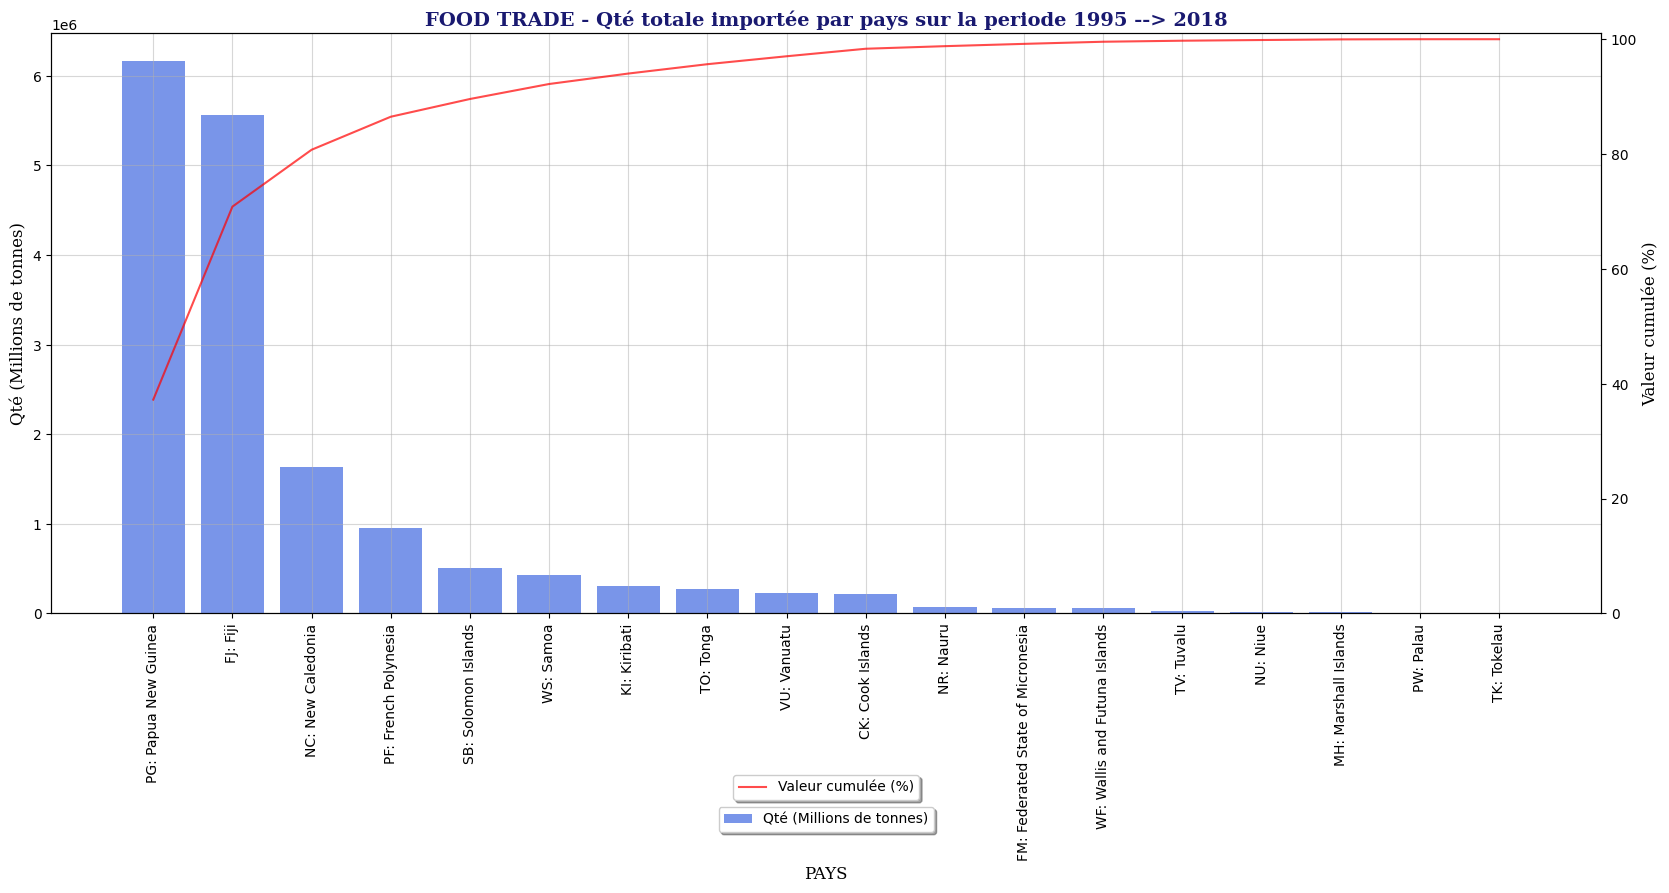

In [16]:
# 1 - Graphique
# Paramètres Titre
graph_title = "FOOD TRADE - Qté totale importée par pays sur la periode 1995 --> 2018"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'     # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "PAYS"
xtick_rotation = 90

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Qté (Millions de tonnes)'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (%)'

graph_linestyle = 'solid'

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), sharex=True)
fig.subplots_adjust(bottom=0.3)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y, fontdict={'family': title_family, 'color': title_color, 'weight': title_weight, 'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})
axe1.set_ylabel(y1_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe1.bar(df_importer_raw.index.values, df_importer_raw.OBS_VALUE,color=y1_color, alpha=y1_alpha, label=y1_label)
axe1.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.71),ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe2.plot(df_importer_raw.index.values, df_importer_raw.PCT_OBS_VALUE_CUMSUM,color=y2_color, linestyle=graph_linestyle, alpha=y2_alpha, label=y2_label)

axe2.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.6),ncol=1, fancybox=True, shadow=True)
axe2.set_ylim(0, 101)

# 1 - Notes
- 80% des qté sont importées par 3 des 18 pays dont l'immense majorité (70%) par 2 pays

In [17]:
# 2 - Analyse
total_import_ton = df_drop['OBS_VALUE'].sum()
df_commodity_raw = df_drop.groupby('COMMODITY: Commodity').agg({'OBS_VALUE': 'sum'}).sort_values('OBS_VALUE', ascending=False)
df_commodity_raw['PCT_OBS_VALUE'] = round(df_commodity_raw['OBS_VALUE']*100/total_import_ton, 2)
df_commodity_raw['PCT_OBS_VALUE_CUMSUM'] = round(df_commodity_raw['PCT_OBS_VALUE'].cumsum(), 2)
print(df_commodity_raw)

                                                    OBS_VALUE  PCT_OBS_VALUE  \
COMMODITY: Commodity                                                           
10: Cereals                                           8461561          51.12   
02: Meat and edible meat offal                        1916937          11.58   
07: Edible vegetables and certain roots and tubers    1333996           8.06   
04: Dairy products, eggs, honey, edible animal ...     963066           5.82   
11: Milling products, malt, starches, inulin, w...     806837           4.87   
17: Sugars and sugar confectionery                     793422           4.79   
22: Beverages, spirits and vinegar                     455437           2.75   
15: Animal,vegetable fats and oils, cleavage pr...     330044           1.99   
20: Vegetable, fruit, nut, etc food preparations       309432           1.87   
08: Edible fruit, nuts, peel of citrus fruit, m...     289400           1.75   
19: Cereal, flour, starch, milk preparat

(0.0, 101.0)

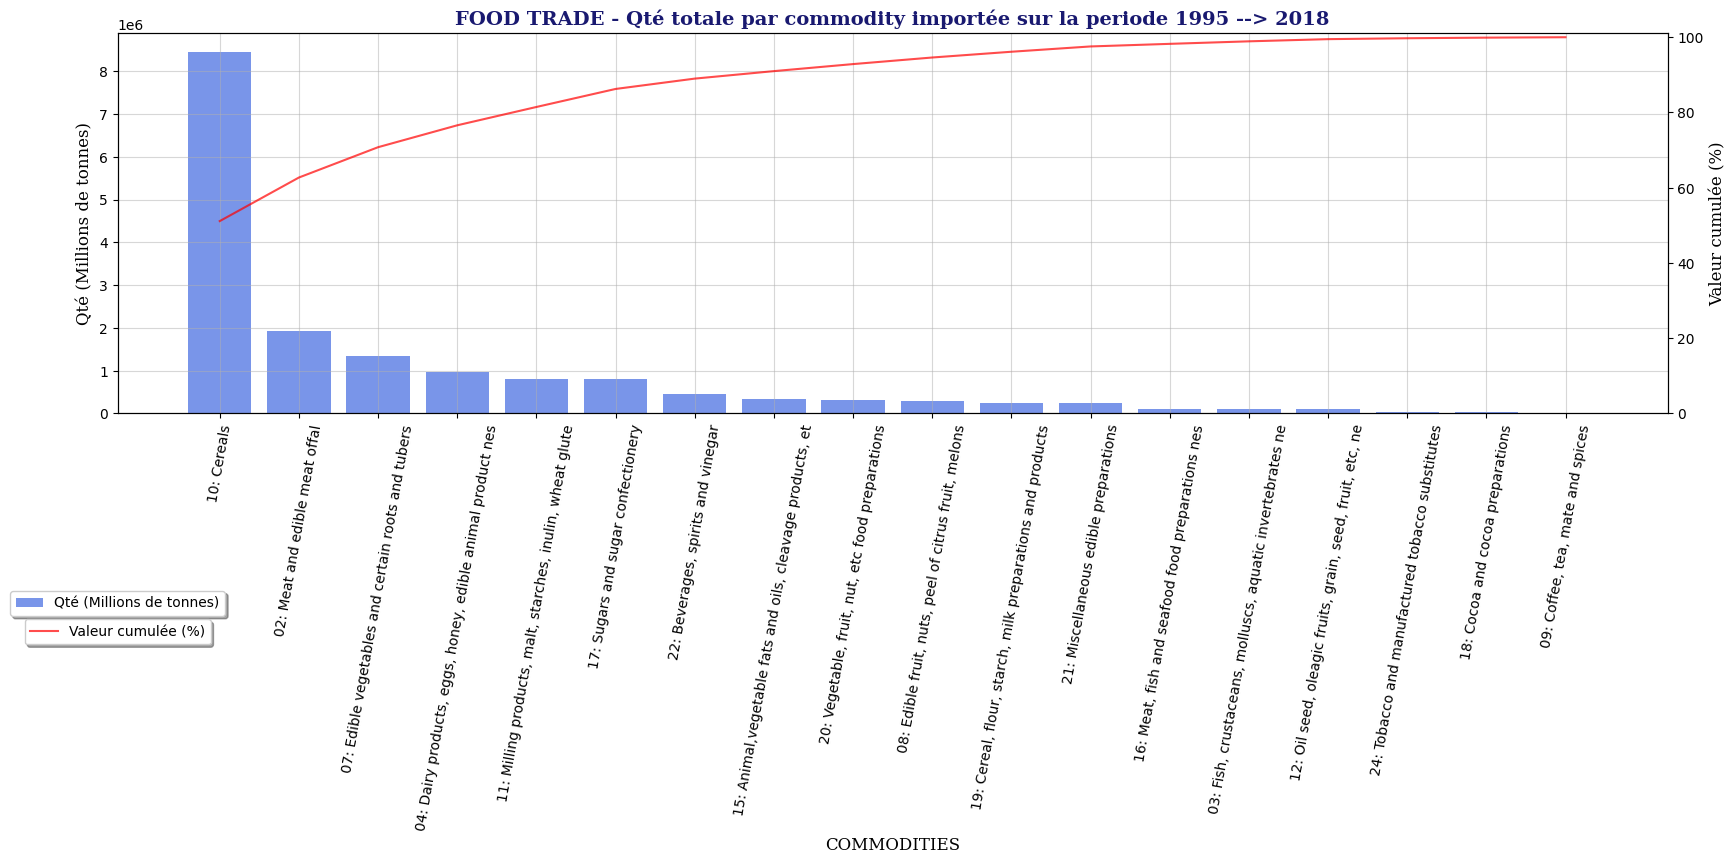

In [19]:
# 2 - Graphique
# Paramètres Titre
graph_title = "FOOD TRADE - Qté totale par commodity importée sur la periode 1995 --> 2018"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold' # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "COMMODITIES"
xtick_rotation = 80

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Qté (Millions de tonnes)'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (%)'

graph_linestyle = 'solid'

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), sharex=True)
fig.subplots_adjust(bottom=0.5)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y, fontdict={'family': title_family, 'color': title_color, 'weight': title_weight, 'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})
axe1.set_ylabel(y1_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe1.bar(df_commodity_raw.index.values, df_commodity_raw.OBS_VALUE,color=y1_color, alpha=y1_alpha, label=y1_label)
axe1.legend(loc="center", bbox_to_anchor=(0, 0, 0, -1),ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

 # Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe2.plot(df_commodity_raw.index.values, df_commodity_raw.PCT_OBS_VALUE_CUMSUM,color=y2_color, linestyle=graph_linestyle, alpha=y2_alpha, label=y2_label)
axe2.legend(loc="center", bbox_to_anchor=(0, 0, 0, -1.15),ncol=1, fancybox=True, shadow=True)
axe2.set_ylim(0, 101)

# 2 - Notes
- Surtout des céréales sont échangés sur l'ensemble du périmètre

In [34]:
# 3 - Analyse
total_import_ton = df_drop['OBS_VALUE'].sum()
df_commodity_importer = df_drop.groupby(['COMMODITY: Commodity', 'IMPORTER: Importer'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_pivot_commodity_importer = df_commodity_importer.pivot_table(columns='IMPORTER: Importer', index='COMMODITY: Commodity', values='OBS_VALUE')
df_pivot_commodity_importer.loc[:,'Row_Total'] = df_pivot_commodity_importer.sum(numeric_only=True, axis=1)
df_pivot_commodity_importer = df_pivot_commodity_importer.sort_values(by=['Row_Total'], ascending=False)
df_pivot_commodity_importer = df_pivot_commodity_importer[df_pivot_commodity_importer.sum().sort_values(ascending = False).index]
print(df_pivot_commodity_importer)

IMPORTER: Importer                                  Row_Total  \
COMMODITY: Commodity                                            
10: Cereals                                         8461561.0   
02: Meat and edible meat offal                      1916937.0   
07: Edible vegetables and certain roots and tubers  1333996.0   
04: Dairy products, eggs, honey, edible animal ...   963066.0   
11: Milling products, malt, starches, inulin, w...   806837.0   
17: Sugars and sugar confectionery                   793422.0   
22: Beverages, spirits and vinegar                   455437.0   
15: Animal,vegetable fats and oils, cleavage pr...   330044.0   
20: Vegetable, fruit, nut, etc food preparations     309432.0   
08: Edible fruit, nuts, peel of citrus fruit, m...   289400.0   
19: Cereal, flour, starch, milk preparations an...   253227.0   
21: Miscellaneous edible preparations                234220.0   
16: Meat, fish and seafood food preparations nes     113441.0   
03: Fish, crustaceans, mo

In [35]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
%matplotlib inline

<Axes: xlabel='IMPORTER: Importer', ylabel='COMMODITY: Commodity'>

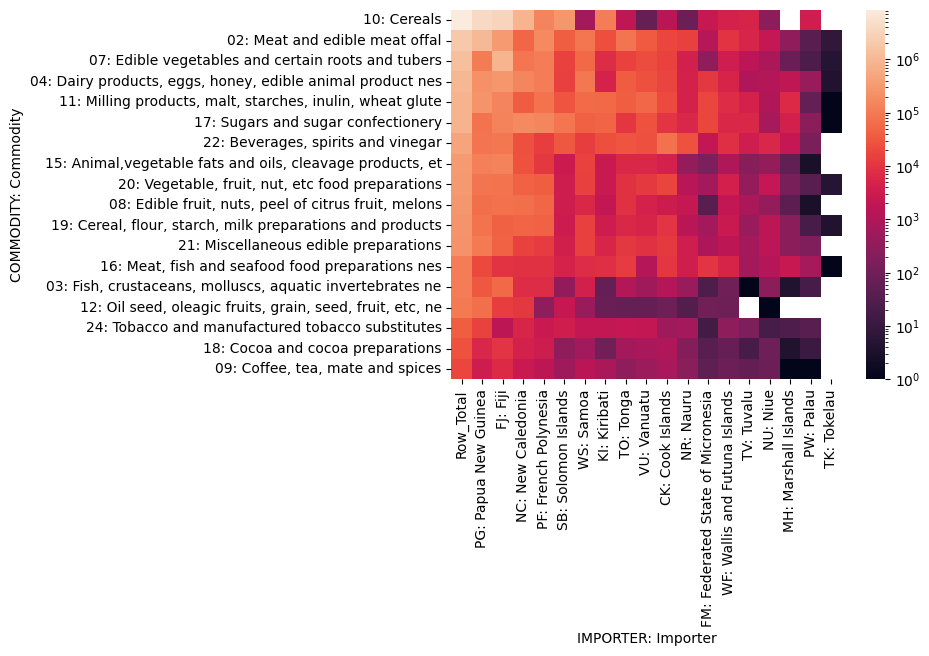

In [36]:
sns.heatmap(df_pivot_commodity_importer, square=True, norm=LogNorm())

Voir qté moyenne et écart type par pays / par an